In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)
%matplotlib inline

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [13]:
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
class ExponentialLR(tf.keras.callbacks.Callback):
    def __init__(self, exp_rate):
        self.rate = exp_rate
        self.rates = []
        self.loss = []
    def on_batch_end(self, batch, logs):
        self.rates.append(float(tf.keras.backend.get_value(self.model.optimizer.learning_rate)))
        self.loss.append(logs["loss"])
        tf.keras.backend.set_value(
            self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.rate)

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [39]:
exp_lr = ExponentialLR(1.005)
history = model.fit(x_train[:5000] / 255., y_train[:5000],
                   batch_size=32,
                   callbacks=[exp_lr])

Train on 5000 samples
5000/5000 [==============================] - 1s 208us/sample - loss: 0.5842 - accuracy: 0.8392


Text(0, 0.5, 'Loss')

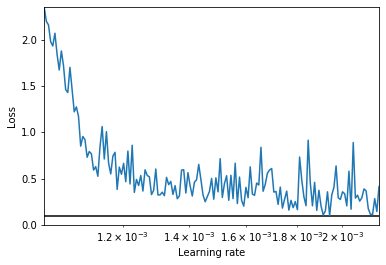

In [40]:
plt.plot(exp_lr.rates, exp_lr.loss)
plt.gca().set_xscale('log')
plt.hlines(min(exp_lr.loss), min(exp_lr.rates), max(exp_lr.rates))
plt.axis([min(exp_lr.rates), max(exp_lr.rates), 0, exp_lr.loss[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [42]:
tf.keras.backend.clear_session()

In [44]:
# Restarting above with learning_rate = 1e-3
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             metrics=['accuracy'])

In [49]:
history = model.fit(x_train / 255., y_train,
                    epochs=50,
                   batch_size=32,
                    validation_data = (x_test, y_test),
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=10), 
                              tf.keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True),
                             tf.keras.callbacks.TensorBoard()])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0438 - accuracy: 0.9863 - val_loss: 14.5048 - val_accuracy: 0.9755
Epoch 2/50
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0333 - accuracy: 0.9896 - val_loss: 18.2511 - val_accuracy: 0.9741
Epoch 3/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0258 - accuracy: 0.9914 - val_loss: 16.5132 - val_accuracy: 0.9796
Epoch 4/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0246 - accuracy: 0.9923 - val_loss: 14.4569 - val_accuracy: 0.9818
Epoch 5/50
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0213 - accuracy: 0.9931 - val_loss: 21.3655 - val_accuracy: 0.9759
Epoch 6/50
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0166 - accuracy: 0.9942 - val_loss: 19.3092 - val_accuracy: 0.9787
Epoch 7/50
60000/60000 [==========================

In [52]:
model = tf.keras.models.load_model("my_mnist_model.h5")
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 7.2285 - accuracy: 0.9818


[14.456922794724562, 0.9818]